## Data Preparation

In [26]:
using DataFrames
using StatsBase: countmap

In [27]:
maxgroup = 4
safety = 150
seat_width = 46
seat_depth = 65
# maxdist = safety / seat_width
maxdist = safety
depth_to_width_ratio = seat_depth / seat_width

1.4130434782608696

In [28]:
data = reduce(vcat, [DataFrame(row = i, seat_no = j) for i in 1:5 for j in 0:9]);

In [29]:
data["values"] = [[i, j] for i in 1:5 for j in 0:9]
head(data)

,row,seat_no,values
,Int64,Int64,Array…
1,1,0,"[1, 0]"
2,1,1,"[1, 1]"
3,1,2,"[1, 2]"
4,1,3,"[1, 3]"
5,1,4,"[1, 4]"
6,1,5,"[1, 5]"


In [30]:
function get_seat_name(r)
    return string("L", 0, r["row"], 0, r["seat_no"])
end

get_seat_name (generic function with 1 method)

In [31]:
data["seats"] = get_seat_name.(eachrow(data))
head(data)

,row,seat_no,values,seats
,Int64,Int64,Array…,String
1,1,0,"[1, 0]",L0100
2,1,1,"[1, 1]",L0101
3,1,2,"[1, 2]",L0102
4,1,3,"[1, 3]",L0103
5,1,4,"[1, 4]",L0104
6,1,5,"[1, 5]",L0105


In [32]:
head(select(groupby(data, :row), :values))

,row,values
,Int64,Array…
1,1,"[1, 0]"
2,1,"[1, 1]"
3,1,"[1, 2]"
4,1,"[1, 3]"
5,1,"[1, 4]"
6,1,"[1, 5]"


In [33]:
tmp = groupby(select(data, [:row, :values]), :row)
rows = Dict()

for i in 1:5
    val = []
    rows[i] = append!(val, [i for i in tmp[i]["values"]]) 
end

rows

Dict{Any,Any} with 5 entries:
  4 => Any[[4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, …
  2 => Any[[2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, …
  3 => Any[[3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, …
  5 => Any[[5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, …
  1 => Any[[1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, …

In [34]:
function make_groups()
    subset = Dict()
    for n in 1:maxgroup
        groups = []
        for vals in values(rows)
            j = [vals[i:end] for i in 1:n]
            e = [[a] for a in collect(zip(j...))]
            f = []
            for i in e
                seat_name = [string("L", 0, t[1], 0, t[2]) for t in i[1]]
                push!(f, join(seat_name, "n"))
            end
            append!(groups, f)
        end
        subset[n] = groups
    end
   return subset
end


make_groups (generic function with 1 method)

In [35]:
all_groups = [i for j in values(make_groups()) for i in j];

In [36]:
all_groups

170-element Array{String,1}:
 "L0400nL0401nL0402nL0403"
 "L0401nL0402nL0403nL0404"
 "L0402nL0403nL0404nL0405"
 "L0403nL0404nL0405nL0406"
 "L0404nL0405nL0406nL0407"
 "L0405nL0406nL0407nL0408"
 "L0406nL0407nL0408nL0409"
 "L0200nL0201nL0202nL0203"
 "L0201nL0202nL0203nL0204"
 "L0202nL0203nL0204nL0205"
 "L0203nL0204nL0205nL0206"
 "L0204nL0205nL0206nL0207"
 "L0205nL0206nL0207nL0208"
 ⋮
 "L0508"
 "L0509"
 "L0100"
 "L0101"
 "L0102"
 "L0103"
 "L0104"
 "L0105"
 "L0106"
 "L0107"
 "L0108"
 "L0109"

In [37]:
seats = copy(data[:seats]);

In [38]:
group_df = DataFrame(groups = all_groups)
ncount = Array{Int64,1}(undef, nrow(group_df))
insertcols!(group_df, 2, :ncount => ncount)

for i in 1:length(group_df[:groups])
    tmp = countmap(group_df[:groups][i])
    if 'n' ∉ keys(tmp)
        group_df[:ncount][i] = 1
    else
        group_df[:ncount][i] = tmp['n'] + 1
    end
end

function countw(str, w)
    tmp = countmap(str)
    if w in keys(tmp)
        return tmp[w]
    else
        return 0
    end
end

countw (generic function with 1 method)

In [39]:
len_g = length(group_df[:groups])
comb = []

for i in 1:len_g
    for j in i:len_g
        if i < j
            push!(comb, [group_df[:groups][i], group_df[:groups][j]])
        end
    end
end

In [40]:
group_df

,groups,ncount
,String,Int64
1,L0400nL0401nL0402nL0403,4
2,L0401nL0402nL0403nL0404,4
3,L0402nL0403nL0404nL0405,4
4,L0403nL0404nL0405nL0406,4
5,L0404nL0405nL0406nL0407,4
6,L0405nL0406nL0407nL0408,4
7,L0406nL0407nL0408nL0409,4
8,L0200nL0201nL0202nL0203,4
9,L0201nL0202nL0203nL0204,4


In [41]:
comb

14365-element Array{Any,1}:
 ["L0400nL0401nL0402nL0403", "L0401nL0402nL0403nL0404"]
 ["L0400nL0401nL0402nL0403", "L0402nL0403nL0404nL0405"]
 ["L0400nL0401nL0402nL0403", "L0403nL0404nL0405nL0406"]
 ["L0400nL0401nL0402nL0403", "L0404nL0405nL0406nL0407"]
 ["L0400nL0401nL0402nL0403", "L0405nL0406nL0407nL0408"]
 ["L0400nL0401nL0402nL0403", "L0406nL0407nL0408nL0409"]
 ["L0400nL0401nL0402nL0403", "L0200nL0201nL0202nL0203"]
 ["L0400nL0401nL0402nL0403", "L0201nL0202nL0203nL0204"]
 ["L0400nL0401nL0402nL0403", "L0202nL0203nL0204nL0205"]
 ["L0400nL0401nL0402nL0403", "L0203nL0204nL0205nL0206"]
 ["L0400nL0401nL0402nL0403", "L0204nL0205nL0206nL0207"]
 ["L0400nL0401nL0402nL0403", "L0205nL0206nL0207nL0208"]
 ["L0400nL0401nL0402nL0403", "L0206nL0207nL0208nL0209"]
 ⋮
 ["L0104", "L0108"]
 ["L0104", "L0109"]
 ["L0105", "L0106"]
 ["L0105", "L0107"]
 ["L0105", "L0108"]
 ["L0105", "L0109"]
 ["L0106", "L0107"]
 ["L0106", "L0108"]
 ["L0106", "L0109"]
 ["L0107", "L0108"]
 ["L0107", "L0109"]
 ["L0108", "L0109"]

In [42]:
function distance(g1, g2)
    dist = 1e+15
    
    for i in 1:countw(g1, 'n') + 1
        _g1 = split(g1, "n")[i]
        _g1_x = parse(Float64, SubString(_g1, 2, 3))
        _g1_y = parse(Float64, SubString(_g1, 4, 5))
        
        for j in 1:countw(g2, 'n') + 1
            _g2 = split(g2, "n")[j]
            _g2_x = parse(Float64, SubString(_g2, 2, 3))
            _g2_y = parse(Float64, SubString(_g2, 4, 5))
#             newdist = sqrt( ( (_g1_x - _g2_x) * (depth_to_width_ratio) )^2 + (_g1_y - _g2_y)^2 )
            newdist = sqrt( ( (_g1_x - _g2_x) * seat_depth )^2 + ( (_g1_y - _g2_y) * seat_width) ^2 )
            dist = min(dist, newdist)
        end
    end
    dist
end         

distance (generic function with 1 method)

In [43]:
conflicting_paris = []

for c in comb
    if distance(c[1], c[2]) < maxdist
        push!(conflicting_paris, c)
    end
end

In [44]:
conflicting_paris

7317-element Array{Any,1}:
 ["L0400nL0401nL0402nL0403", "L0401nL0402nL0403nL0404"]
 ["L0400nL0401nL0402nL0403", "L0402nL0403nL0404nL0405"]
 ["L0400nL0401nL0402nL0403", "L0403nL0404nL0405nL0406"]
 ["L0400nL0401nL0402nL0403", "L0404nL0405nL0406nL0407"]
 ["L0400nL0401nL0402nL0403", "L0405nL0406nL0407nL0408"]
 ["L0400nL0401nL0402nL0403", "L0406nL0407nL0408nL0409"]
 ["L0400nL0401nL0402nL0403", "L0200nL0201nL0202nL0203"]
 ["L0400nL0401nL0402nL0403", "L0201nL0202nL0203nL0204"]
 ["L0400nL0401nL0402nL0403", "L0202nL0203nL0204nL0205"]
 ["L0400nL0401nL0402nL0403", "L0203nL0204nL0205nL0206"]
 ["L0400nL0401nL0402nL0403", "L0204nL0205nL0206nL0207"]
 ["L0400nL0401nL0402nL0403", "L0300nL0301nL0302nL0303"]
 ["L0400nL0401nL0402nL0403", "L0301nL0302nL0303nL0304"]
 ⋮
 ["L0104", "L0105"]
 ["L0104", "L0106"]
 ["L0104", "L0107"]
 ["L0105", "L0106"]
 ["L0105", "L0107"]
 ["L0105", "L0108"]
 ["L0106", "L0107"]
 ["L0106", "L0108"]
 ["L0106", "L0109"]
 ["L0107", "L0108"]
 ["L0107", "L0109"]
 ["L0108", "L0109"]

## Graph representation of the groups' connections

In [45]:
using LightGraphs
using MetaGraphs
using GraphPlot

In [46]:
m = length(group_df.groups)
v_graph = Graph(m)
venue_graph = MetaGraph(v_graph)

for (i, v) in enumerate(vertices(venue_graph))
    set_prop!(venue_graph, v, :name, group_df.groups[i])
end

set_indexing_prop!(venue_graph, :name)

Set{Symbol} with 1 element:
  :name

In [47]:
# very slow...
for c in conflicting_paris
    for v1 in vertices(venue_graph)
        for v2 in vertices(venue_graph)
            if venue_graph[v1, :name] == c[1] && venue_graph[v2, :name] == c[2]
                add_edge!(venue_graph, v1, v2)
            end
        end
    end
end

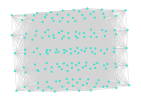

In [48]:
gplot(venue_graph)

In [49]:
max_cli = maximal_cliques(venue_graph)

117-element Array{Array{Int64,1},1}:
 [160, 21, 7, 43, 128, 42, 104, 87, 129, 44  …  27, 70, 69, 26, 110, 158, 68, 25, 157, 109]
 [160, 21, 7, 43, 128, 42, 104, 87, 129, 44  …  112, 27, 70, 69, 26, 110, 158, 130, 62, 149]
 [160, 21, 7, 43, 128, 42, 104, 87, 129, 44  …  71, 159, 86, 112, 27, 70, 150, 130, 62, 149]
 [131, 89, 46, 55, 8, 142, 97, 54, 15, 16  …  99, 56, 122, 37, 2, 81, 36, 141, 82, 1]
 [131, 89, 46, 55, 8, 142, 97, 54, 15, 16  …  56, 11, 134, 92, 48, 1, 37, 2, 81, 82]
 [131, 89, 46, 55, 8, 142, 97, 54, 15, 16  …  30, 163, 31, 29, 74, 72, 162, 113, 115, 73]
 [131, 89, 46, 55, 8, 142, 97, 54, 15, 16  …  99, 56, 141, 30, 29, 114, 72, 162, 113, 73]
 [131, 89, 46, 55, 8, 142, 97, 54, 15, 16  …  29, 30, 162, 72, 113, 73, 163, 31, 74, 115]
 [131, 89, 46, 55, 8, 142, 97, 54, 15, 16  …  10, 161, 114, 29, 30, 162, 72, 113, 73, 141]
 [131, 89, 46, 55, 8, 142, 97, 54, 15, 16  …  37, 122, 99, 143, 17, 36, 56, 141, 82, 1]
 [80, 95, 20, 14, 52, 96, 169, 21, 34, 35  …  12, 170, 104, 53, 6

In [50]:
idx_to_name = Dict()
for i in 1:m
    idx_to_name[i] = venue_graph[i, :name]
end

name_to_idx = Dict()
for i in 1:m
    name_to_idx[venue_graph[i, :name]] = i
end

## Optimization Problem

In [51]:
using JuMP
using GLPK

In [52]:
mod = Model(GLPK.Optimizer)
@variable(mod, x[1:m], Bin)

for cli in max_cli
    @constraint(mod, sum(x[i] for i in cli) <= 1)
end

@objective(mod, Max, sum(x[i] * (countw(idx_to_name[i], 'n') + 1) for i in 1:m))

optimize!(mod)

In [53]:
JuMP.termination_status(mod)

OPTIMAL::TerminationStatusCode = 1

In [54]:
JuMP.objective_value(mod)

16.000000000000004

In [55]:
df_res = DataFrame(idx = 1:length(all_groups), dv = JuMP.value.(x))
df_res = df_res[df_res.dv .== 1.0, :]

,idx,dv
,Int64,Float64
1,1,1.0
2,14,1.0
3,28,1.0
4,29,1.0


In [56]:
df_res = DataFrame(idx = 1:length(all_groups), dv = JuMP.value.(x))
df_res = df_res[df_res.dv .== 1.0, :]

,idx,dv
,Int64,Float64
1,1,1.0
2,14,1.0
3,28,1.0
4,29,1.0


In [57]:
for i in df_res.idx
    println(idx_to_name[i])
end

L0400nL0401nL0402nL0403
L0206nL0207nL0208nL0209
L0506nL0507nL0508nL0509
L0100nL0101nL0102nL0103
